In [11]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Definir parâmetros
# =========================
context_length = 256  # históricos para o modelo
horizon = 12          # passos a prever
N = context_length + horizon  # total da série

model_path = "moe_model.pt"
device = "cpu"

# =========================
# 2. Criar série sintética 
# =========================
t = np.arange(N)
series = np.sin(2 * np.pi * t / 50) + 0.1 * np.random.randn(N)

In [12]:
horizon

12

In [13]:
context_length

256

In [14]:
(series[:-horizon]).shape

(256,)

In [15]:
# =========================
# 2. Predizer
# =========================
from setup.models.modeling_model import predict_from_model

preds = predict_from_model(model_path=model_path, series=series[:-horizon], horizon=horizon, context_length=context_length, device=device)
print(preds)

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


256
12
-----------
168
12
tensor([[-0.8222, -0.9188, -0.9701, -0.8573, -0.8213, -0.7293, -0.6537, -0.5540,
         -0.4437, -0.1206, -0.2509, -0.2732, -0.0105,  0.0650,  0.2922,  0.3480,
          0.4816,  0.4835,  0.8343,  0.6517,  0.9143,  0.6740,  0.9678,  0.9686,
          1.0695,  0.9970,  0.9303,  1.1369,  0.8181,  0.6893,  0.6745,  0.6338,
          0.5877,  0.4327,  0.4430,  0.2217,  0.1517, -0.1333,  0.0471, -0.3479,
         -0.5005, -0.5423, -0.7429, -0.5241, -0.5793, -0.8157, -0.9691, -1.0136,
         -1.0521, -0.8998, -1.1114, -0.8714, -1.0779, -0.9244, -0.7684, -0.7220,
         -0.7337, -0.5514, -0.4977, -0.4461, -0.4289, -0.0939,  0.0473,  0.1986,
          0.4633,  0.3932,  0.5679,  0.3826,  0.6028,  0.8908,  0.9263,  0.9738,
          0.9550,  1.0146,  1.0585,  0.9417,  0.8059,  1.0047,  1.0458,  0.9947,
          0.6551,  0.6447,  0.6484,  0.5599,  0.4065,  0.3287,  0.1003,  0.0139,
         -0.2441, -0.1470, -0.2161, -0.6180, -0.5863, -0.9309, -0.9001, -0.9638,
  

In [16]:
# =========================
# 3. Converter saída em array
# =========================
pred_list = preds.squeeze(0).tolist()
pred_array = np.array(pred_list)

In [17]:
pred_array

array([0.65976048, 0.73556381, 0.79440403, 0.85344911, 0.90443861,
       0.94858348, 0.98490608, 1.00250793, 0.99852121, 0.97787869,
       0.95562851, 0.91050971])

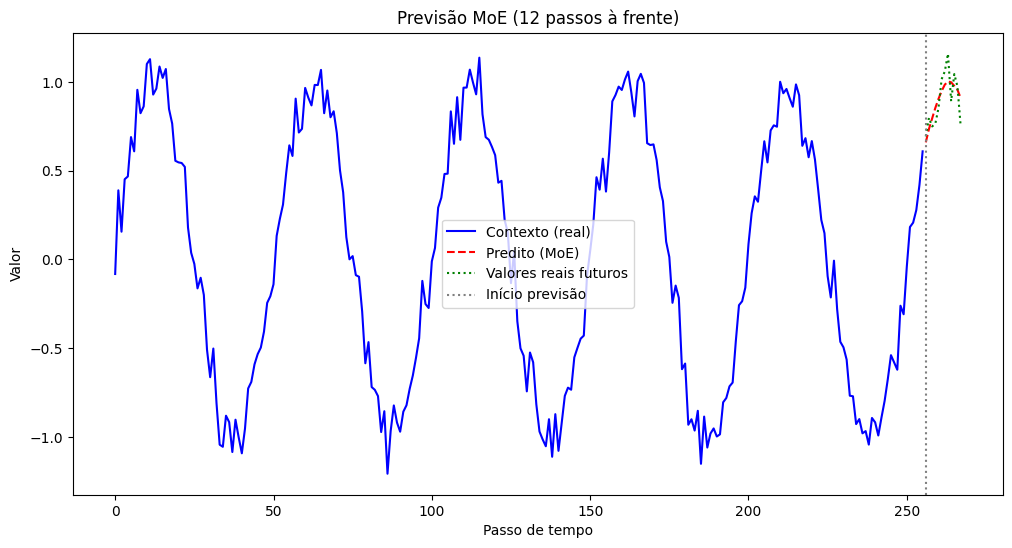

In [18]:
# =========================
# 4. Plotar
# =========================
context = series[:context_length]
future_real = series[context_length:] 

time_axis_context = range(context_length)
time_axis_pred = range(context_length, context_length + horizon)
time_axis_real = range(context_length, context_length + horizon)

plt.figure(figsize=(12,6))
plt.plot(time_axis_context, context, label="Contexto (real)", color="blue")
plt.plot(time_axis_pred, pred_array, label="Predito (MoE)", color="red", linestyle="--")
plt.plot(time_axis_real, future_real, label="Valores reais futuros", color="green", linestyle=":")

plt.axvline(context_length, color="gray", linestyle=":", label="Início previsão")
plt.legend()
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.title(f"Previsão MoE ({horizon} passos à frente)")
plt.show()